In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from pprint import pprint
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split

import graphviz
import pydotplus
import io
from scipy import misc

In [4]:
data=pd.read_csv('data.csv')

In [5]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [8]:
train , test = train_test_split(data,test_size=0.15)

In [9]:
print("Traning size:{};Test size:{}".format(len(train),len(test)))

Traning size:1714;Test size:303


In [10]:
train.shape

(1714, 17)

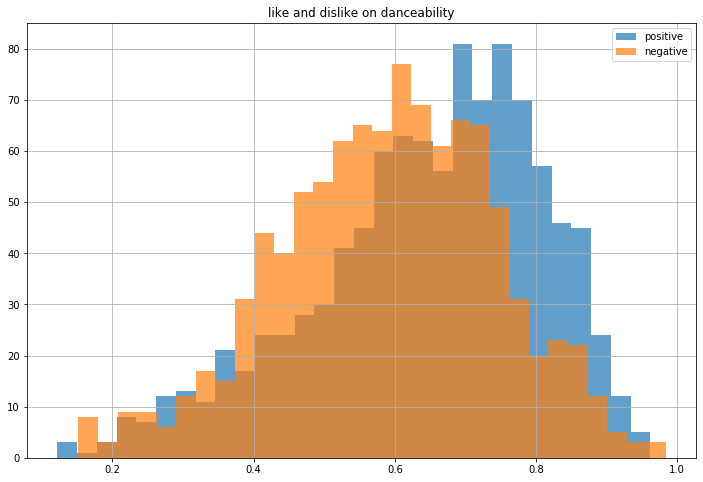

In [11]:
pos_dance=data[data['target']==1]['danceability']
neg_dance=data[data['target']==0]['danceability']

fig=plt.figure(figsize=(12,8))
plt.title("like and dislike on danceability")

pos_dance.hist(alpha=0.7,bins=30,label='positive')
neg_dance.hist(alpha=0.7,bins=30,label='negative')
plt.legend(loc="upper right")

In [12]:
p=DecisionTreeClassifier(min_samples_split=100)

In [13]:
features=["danceability","loudness","valence","energy","instrumentalness","acousticness","key","speechiness","duration_ms"]

In [14]:
x_train=train[features]
y_train=train["target"]

x_test=test[features]
y_test=test["target"]

In [15]:
dt=p.fit(x_train,y_train)

In [16]:
y_pred=p.predict(x_test)

In [17]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [18]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_test,y_pred)*100

In [19]:
print("Accuracy is:- ", round(score,1),"%")

Accuracy is:-  72.9 %


[Text(172.98, 208.38, 'X[4] <= 0.0\ngini = 0.5\nsamples = 1714\nvalue = [835, 879]'),
 Text(100.44, 190.26, 'X[7] <= 0.125\ngini = 0.465\nsamples = 833\nvalue = [527, 306]'),
 Text(55.8, 172.14, 'X[0] <= 0.713\ngini = 0.39\nsamples = 610\nvalue = [448, 162]'),
 Text(22.32, 154.01999999999998, 'X[8] <= 163780.0\ngini = 0.325\nsamples = 441\nvalue = [351, 90]'),
 Text(11.16, 135.89999999999998, 'gini = 0.498\nsamples = 32\nvalue = [15, 17]'),
 Text(33.480000000000004, 135.89999999999998, 'X[1] <= -9.156\ngini = 0.293\nsamples = 409\nvalue = [336, 73]'),
 Text(22.32, 117.77999999999999, 'gini = 0.49\nsamples = 35\nvalue = [20, 15]'),
 Text(44.64, 117.77999999999999, 'X[2] <= 0.799\ngini = 0.262\nsamples = 374\nvalue = [316, 58]'),
 Text(33.480000000000004, 99.66, 'X[4] <= 0.0\ngini = 0.237\nsamples = 349\nvalue = [301, 48]'),
 Text(22.32, 81.53999999999999, 'X[5] <= 0.018\ngini = 0.185\nsamples = 290\nvalue = [260, 30]'),
 Text(11.16, 63.41999999999999, 'gini = 0.361\nsamples = 76\nvalue 

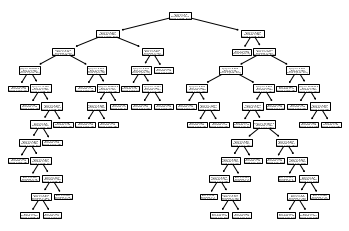

In [20]:
tree.plot_tree(dt)